In [2]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.neighbors import KernelDensity
import ipywidgets as widgets

(50, 10000) (50, 10000)


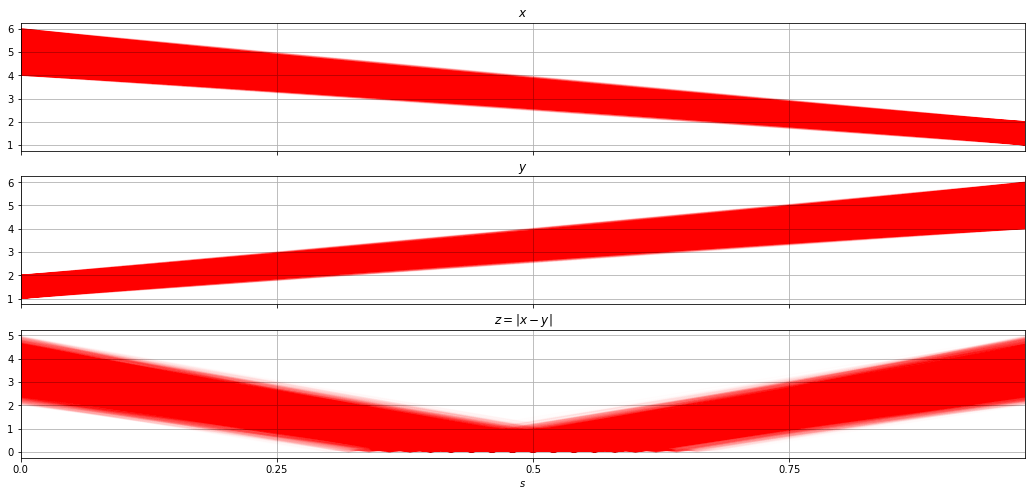

In [12]:
x1 = np.random.uniform(4,6, 10000)
x2 = np.random.uniform(1,2, 10000)

y1 = np.random.uniform(1,2, 10000)
y2 = np.random.uniform(4,6, 10000)

T_s = 50
alpha = np.linspace(0, 1, T_s)

x = np.array([a * x2 + (1-a) * x1 for a in alpha])
y = np.array([a * y2 + (1-a) * y1 for a in alpha])
z = np.abs(x - y)

print(x.shape, y.shape)

plt.figure(figsize=(18,8))
ax1 = plt.subplot(3,1,1)
plt.title(r'$x$')
plt.plot(x[:200,:], c='r', alpha=0.01)
plt.xticks(np.linspace(0,T_s,5), '')
plt.xlim(0, T_s-1)
plt.grid()

ax2 = plt.subplot(3,1,2)
plt.title(r'$y$')
plt.plot(y[:200,:], c='r', alpha=0.01)
plt.grid()
plt.xticks(np.linspace(0,T_s,5), '')
plt.xlim(0, T_s-1)

ax3 = plt.subplot(3,1,3)
plt.title(r'$z = \vert x - y \vert$')
plt.plot(z[:200,:], c='r', alpha=0.01)
plt.grid()
plt.xticks(np.linspace(0,T_s,5), np.linspace(0, 1, 5))
plt.xlim(0, T_s-1)
plt.xlabel(r'$s$')

plt.show()

In [13]:
T_v = 100
xlim = [-1,5]
pdfs = np.empty((T_s, T_v))
for s in range(T_s):
    kde = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(z[s,:].reshape((-1,1)))
    x_plot = np.linspace(xlim[0], xlim[1], T_v)
    pdfs[s,:] = np.exp(kde.score_samples(x_plot.reshape((-1,1))))

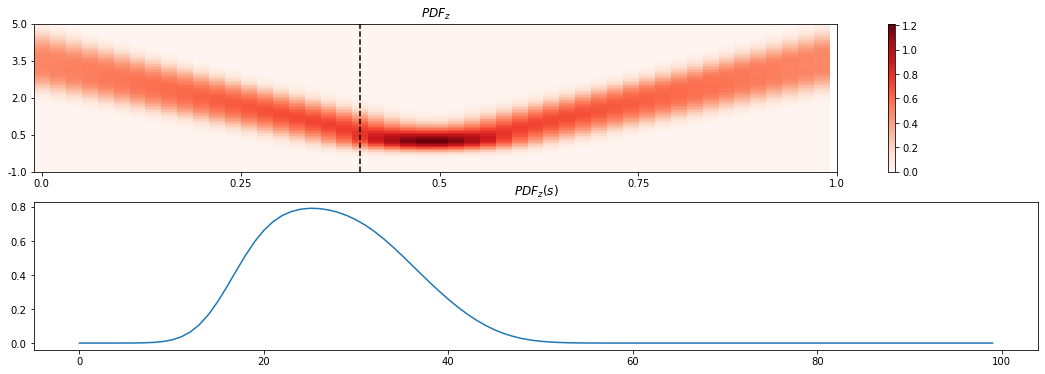

In [14]:
s = 20
plt.figure(figsize=(18,6))
plt.subplot(2,1,1)
plt.title(r'$PDF_z$')
plt.imshow(pdfs.T, cmap='Reds', aspect='auto', origin='lower', interpolation='none')
plt.colorbar()
plt.vlines(s, 0, T_v, colors='k', ls='dashed')
plt.xticks(np.linspace(0,T_s,5), np.linspace(0,1,5))
plt.yticks(np.linspace(0,T_v,5), np.linspace(xlim[0],xlim[1],5))
plt.ylim(0,T_v)

plt.subplot(2,1,2)
plt.title(r'$PDF_z(s)$')
plt.plot(pdfs[s,:])

plt.show()

In [15]:
@widgets.interact(s=(0,T_s-1,1))
def show_pdf(s=0):
    plt.figure(figsize=(18,6))
    plt.subplot(2,1,1)
    plt.imshow(pdfs.T, cmap='Reds', aspect='auto', origin='lower', interpolation='none')
    plt.colorbar()
    plt.vlines(s, 0, T_v, colors='k', ls='dashed')
    plt.xticks(np.linspace(0,T_s,5), np.linspace(0,1,5))
    plt.yticks(np.linspace(0,T_v,5), np.linspace(xlim[0],xlim[1],5))
    plt.ylim(0,T_v)

    plt.subplot(2,1,2)
    plt.plot(pdfs[s,:])
    plt.ylim(0,1.3)

    plt.show()

interactive(children=(IntSlider(value=0, description='s', max=49), Output()), _dom_classes=('widget-interact',…